<hr>
23-Jan-23       CBL       Original - Trying to look at a loop antenna build <br>
<br>
The loop is 23.125 inches in diameter. There are 15 turns of number 22 enamled wire on a wooden hoop that I got from Michael's craft store. I believe that this hoop is traditionally used for quilting. Using "Professor Coyle" https://crystalradio.net/professorcoyle/professorcoylecyl.shtml the total inductance ends up being about $227 \mu H$ total inductance. This is within the range of using a 20-365pf air variable cap to tune from 0.5-2.3MHz.
This notebook is to explore how well that antenna will work. <br>
Something to explore at a later time: https://pypi.org/project/MagnetiCalc/ <br> 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def ApproximateInductance(n, r, l):
    """
    Determine the approximate inducance of a single layer solenoid, u_r =1
    @param n - number of turns
    @param r - radius in inches
    @param l - overall length in inches
    """
    L = np.power(n,2.0)*np.power(r,2.0)/(9*r+10*l)
    return L

In [6]:
ApproximateInductance(15,23.125/2,1)

263.7200342465753

In [7]:
def Inductance2(n,R_loop,r_wire):
    """
    Formula obtained here: https://www.thompsonrd.com/induct2.pdf. This reference uses the book Inductance 
    calculations by Grover which is excellent.
    """
    u_0 = 4.0*np.pi*1.0e-7 # N/A - Free space permability
    L = u_0 * R_loop*(np.log(8*R_loop/r_wire)-1.75)
    return n*L

In [16]:
# 22 gauge wire diameter
Gauge22_d = 0.0266   # inches
R_Loop = 23.125/2.0
Inductance2(15, R_Loop*0.0254, Gauge22_d/2*0.0254)

2.6192826332558468e-06

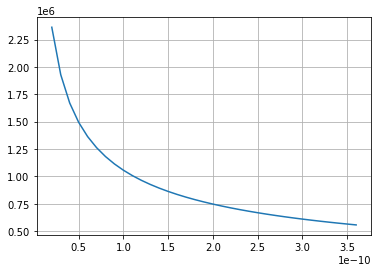

In [17]:
"""
Lets look at what happens as we vary the capacitance
"""
C = np.arange(20.0,365.0, 10.0) * 1.0e-12      # pF, typical tuning cap for AM radio
L = 227.0e-6                                   # Henries
F = 1.0/(2.0*np.pi*np.sqrt(L*C))
plt.plot(C,F)
plt.grid()

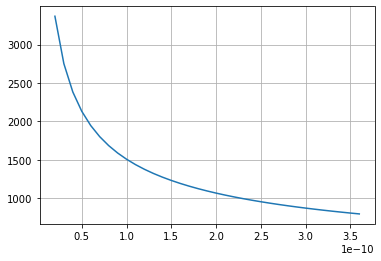

In [18]:
# And how does the impedance change
Z = np.sqrt(L/C)
plt.plot(C,Z)
plt.grid()

In [19]:
# What C is required for very low values of resonance
FLow = 60.0e3   # Hz
CLow = 1.0/(L*np.power(2.0*np.pi*FLow,2.0))
ZLow = np.sqrt(L/CLow)
print ("CLow: ", CLow, " ZLow: ", ZLow)

CLow:  3.0996446292932506e-08  ZLow:  85.57698388378596


In general the loop impedence drops as the frequency drops and the capacitance goes up. The ratio of L/C gets smaller. <br>

What is the EMF at the terminals like? <br>
<ul>
    <li>Faraday's later Lenz  law is: $V = N{d\phi_{B} \over{dt}}$ </li>
    <li> $\phi = BA $ where B is the magnetic field and A is the Area meaning $V = A {dB\over{dt}}$ </li>
    <li> Therefore the voltage is proportional to the Area and for a loop $R^2$ </li>
</ul>
For a fixed frequency and field strength we should get more voltage. <br> 
To transform the impedance mismatch we can use a ratio of areas. 

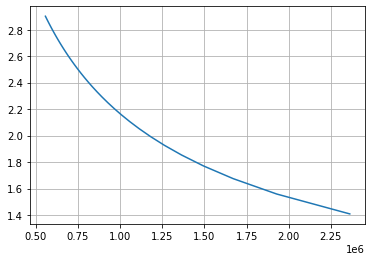

In [22]:
# For the above Z how do I get to 50 ohms?
ALoop = np.pi * np.power(R_Loop,2.0)
A_feed = ALoop * 50.0/Z
r_feed = np.sqrt(A_feed/np.pi)
plt.plot(F,r_feed)
plt.grid()